In [ ]:
import pandas as pd
import geopandas as gpd

In [ ]:
#read tif boundareis
tif = gpd.read_file('/content/Boundaries - TIF.geojson')

#read new TIF demographic data
tif_demo = gpd.read_file('/content/TIF Demographics.csv')

tif_phil = gpd.read_file('/content/2022_out.csv')

In [ ]:
tif.sample(1)

,sbif,name,shape_area,show,objectid_1,name_trim,wards_2023,ref,approval_d,objectid,...,shape_leng,comm_area,objectid_2,use,repealed_d,type,shape_le_1,ind,expiration,geometry
87,N,Red Line Extension (RLE),62833407.0184,0,91,Red Line Extension (RLE),"3,4,11,25,28,34,42",T-186,12/14/2022,0,...,119358.186312,"28,31,32,33,34,35,60",133,Transit Facilities,None,Existing,119358.186312,Transportation,12/31/2058,"MULTIPOLYGON (((-87.63941 41.82986, -87.63941 ..."


In [ ]:
#copy columns neeeded from TIF boundareis
tifcopy = tif[['name','name_trim','objectid','geometry']]

In [ ]:
# Merge the two DataFrames on the common column
tif2 = pd.merge(tifcopy, tif_demo, left_on='name', right_on='TIF', how='inner')

In [ ]:
# Rename the column
tif2 = tif2.rename(columns={'geometry_x': 'geometry'})

In [ ]:
tif2.sample(5)

,name,name_trim,objectid,geometry,TIF,Black Median Income,White Median Income,Hispanic Median Income,Median Income,geometry_y
107,67th/Cicero,67th/Cicero,5142,"MULTIPOLYGON (((-87.73770 41.77111, -87.73770 ...",67th/Cicero,1356.17,735.84,1615.61,1073.98,None
108,Touhy/Western,Touhy/ Western,5147,"MULTIPOLYGON (((-87.67987 42.00488, -87.67961 ...",Touhy/Western,5722.65,9882.22,11439.35,8067.43,None
53,Stevenson/Brighton,Stevenson/Brighton,5139,"MULTIPOLYGON (((-87.69499 41.83180, -87.69502 ...",Stevenson/Brighton,519.48,12125.62,10884.04,10132.24,None
56,Bronzeville,Bronzeville,0,"MULTIPOLYGON (((-87.62796 41.84422, -87.62820 ...",Bronzeville,13471.03,51524.98,56798.7,13436.63,None
101,Washington Park,Washington Park,5225,"MULTIPOLYGON (((-87.60606 41.79481, -87.60604 ...",Washington Park,14741.87,1618.41,1388.91,14169.18,None


In [ ]:
# After creating new merged df I will save it in again
tif2.to_csv('TIFDemographics3.csv', index=False)

In [ ]:
# import mapping packages
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt

In [ ]:
# Create a base layer for the interactive heatmap for census tracts
fig = px.choropleth_mapbox(
    tif2,
    geojson=tif2.geometry,
    locations=tif2.index,
    color='Median Income',  # Color based on population
    color_continuous_scale="Viridis",  # Choose a color scale
    range_color=[min(tif2['Median Income']), 190000],  # Set color range explicitly
    mapbox_style="carto-positron",
    center={"lat": tif.centroid.y.mean(), "lon": tif.centroid.x.mean()},
    zoom=10,
    opacity=0.5,
    labels={'name': 'tract'},
    hover_name='name',  # Display community area name on hover
)
#fig.show()

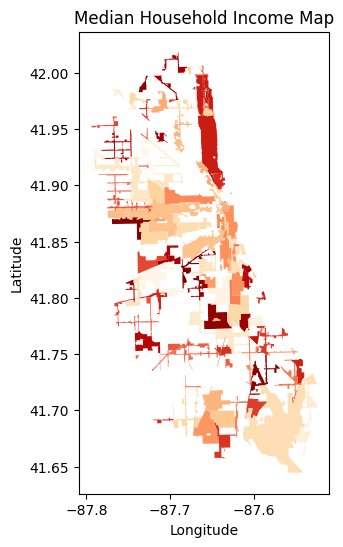

In [ ]:
# Plot the map
tif2.plot(column='Median Income', cmap='OrRd', legend=False, figsize=(10, 6))
plt.title('Median Household Income Map')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [ ]:
# Read the DataFrame into a GeoDataFrame
gdf = gpd.GeoDataFrame(tif2, geometry='geometry')

<ipython-input-118-04ea9bf45c68>:9: MatplotlibDeprecationWarning:

Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.



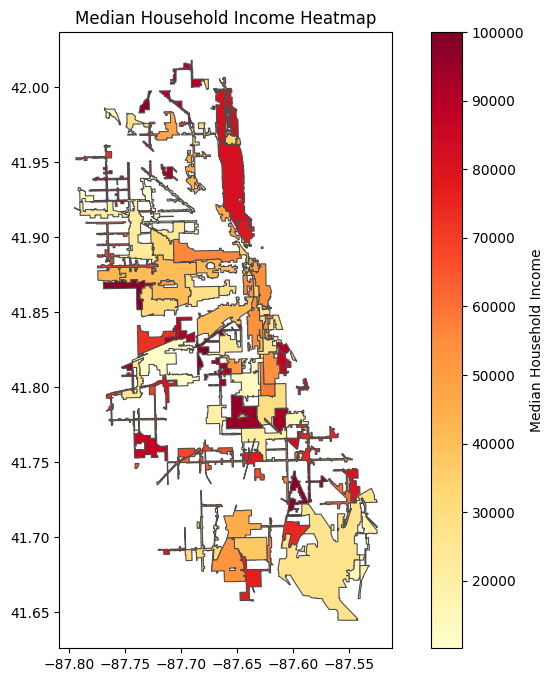

In [ ]:
# Plot the GeoDataFrame
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
gdf.plot(column='Median Income', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.3')

# Add a legend
vmin, vmax = tif2['Median Income'].min(), tif2['Median Income'].max()
sm = plt.cm.ScalarMappable(cmap='YlOrRd', norm=plt.Normalize(vmin=vmin, vmax=100000))
sm._A = []  # fake up the array of the scalar mappable
cbar = plt.colorbar(sm)
cbar.set_label('Median Household Income')

# Set plot title
plt.title('Median Household Income Heatmap')

# Show the plot
plt.show()

<ipython-input-115-0746e79f026c>:9: MatplotlibDeprecationWarning:

Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.



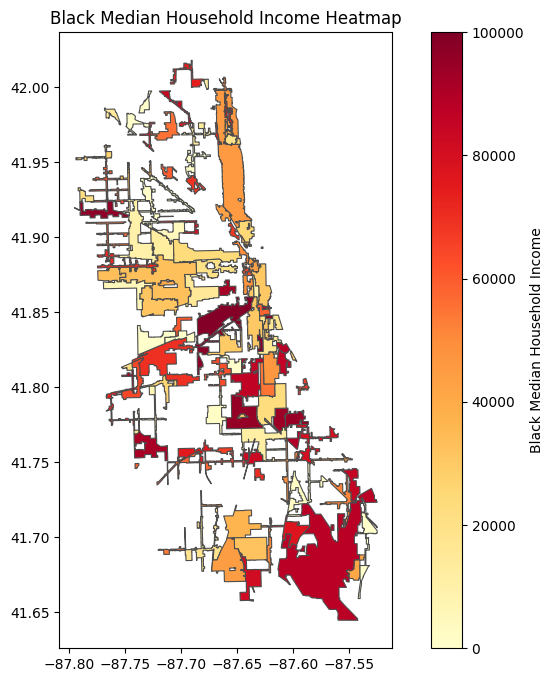

In [ ]:
# Plot the GeoDataFrame
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
gdf.plot(column='Black Median Income', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.3')

# Add a legend
vmin, vmax = tif2['Black Median Income'].min(), tif2['Black Median Income'].max()
sm = plt.cm.ScalarMappable(cmap='YlOrRd', norm=plt.Normalize(vmin=vmin, vmax=100000))
sm._A = []  # fake up the array of the scalar mappable
cbar = plt.colorbar(sm)
cbar.set_label('Black Median Household Income')

# Set plot title
plt.title('Black Median Household Income Heatmap')

# Show the plot
plt.show()

<ipython-input-114-9cb10da9084a>:9: MatplotlibDeprecationWarning:

Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.



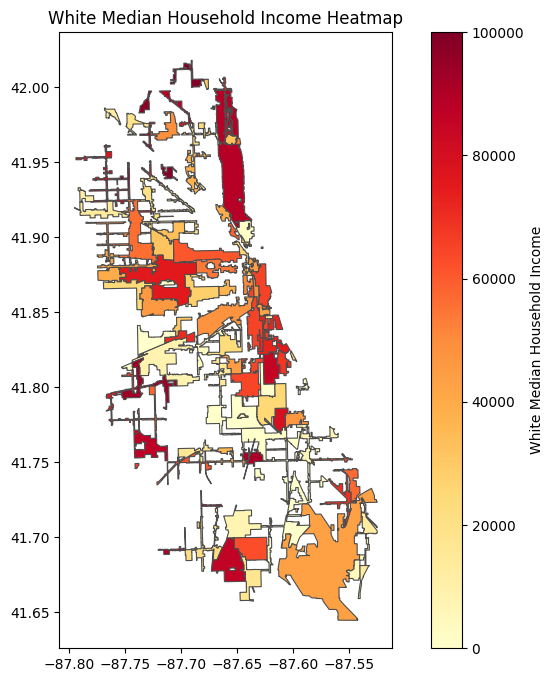

In [ ]:
# Plot the GeoDataFrame
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
gdf.plot(column='White Median Income', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.3')

# Add a legend
vmin, vmax = tif2['White Median Income'].min(), tif2['White Median Income'].max()
sm = plt.cm.ScalarMappable(cmap='YlOrRd', norm=plt.Normalize(vmin=vmin, vmax=100000))
sm._A = []  # fake up the array of the scalar mappable
cbar = plt.colorbar(sm)
cbar.set_label('White Median Household Income')

# Set plot title
plt.title('White Median Household Income Heatmap')

# Show the plot
plt.show()

<ipython-input-117-47e7b455d1dd>:9: MatplotlibDeprecationWarning:

Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.



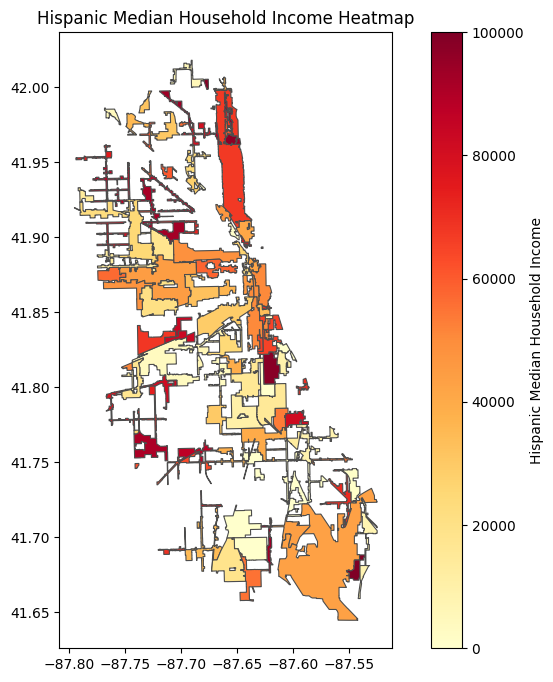

In [ ]:
# Plot the GeoDataFrame
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
gdf.plot(column='Hispanic Median Income', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.3')

# Add a legend
vmin, vmax = tif2['Hispanic Median Income'].min(), tif2['Hispanic Median Income'].max()
sm = plt.cm.ScalarMappable(cmap='YlOrRd', norm=plt.Normalize(vmin=vmin, vmax=100000))
sm._A = []  # fake up the array of the scalar mappable
cbar = plt.colorbar(sm)
cbar.set_label('Hispanic Median Household Income')

# Set plot title
plt.title('Hispanic Median Household Income Heatmap')

# Show the plot
plt.show()

Now will merge new TIF Demographics df with Philip Yates TIF data

In [ ]:
# Merge the two DataFrames on the common column
tif3 = pd.merge(tif2, tif_phil, left_on='name', right_on='tif_name', how='inner')

In [ ]:
tif3.sample(5)

,name,name_trim,objectid,geometry_x,TIF,Black Median Income,White Median Income,Hispanic Median Income,Median Income,geometry_y,...,transfers_in,cumulative_transfers_in,expenses,fund_balance_end,transfers_out,distribution,admin_costs,finance_costs,bank,geometry_y
8,Goose Island,Goose Island,5213,"MULTIPOLYGON (((-87.65379 41.90768, -87.65298 ...",Goose Island,5153.26,37630.68,0,24744.38,None,...,0,31000000,3370249,32870079,0,4970300,128118,0,,None
61,107th/Halsted,107th/Halsted,5182,"MULTIPOLYGON (((-87.65223 41.69613, -87.65222 ...",107th/Halsted,18648.24,41730.92,0,17859.37,None,...,0,1000000,373679,3687423,0,0,0,0,,None
87,Little Village Industrial Corridor,Little Village Industrial Corridor,5201,"MULTIPOLYGON (((-87.73644 41.83887, -87.73643 ...",Little Village Industrial Corridor,0.00,0,6103.68,6142.06,None,...,0,0,200230,3812022,0,0,17347,0,,None
92,Madison/Austin Corridor,Madison/Austin Corridor,5176,"MULTIPOLYGON (((-87.76715 41.89150, -87.76715 ...",Madison/Austin Corridor,5352.87,26513.94,13085.96,5652.78,None,...,0,64687897,996995,13657222,0,0,54659,0,,None
7,Diversey/Chicago River,Diversey/Chicago River,5173,"MULTIPOLYGON (((-87.68309 41.93505, -87.68300 ...",Diversey/Chicago River,4833.44,11931.38,0,10578.5,None,...,0,526000,8024,1377351,0,0,0,0,,None
